In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# advanced algorthms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
corr = pd.DataFrame(df.corr()['left'].drop('left'))
corr.sort_values(['left'], ascending = False)

,left
time_spend_company,0.144822
average_montly_hours,0.071287
number_project,0.023787
last_evaluation,0.006567
promotion_last_5years,-0.061788
Work_accident,-0.154622
satisfaction_level,-0.388375


In [7]:
df =  pd.get_dummies(df, columns=["sales", "salary"],
                         prefix=["sales", "salary"],
                         drop_first=True)
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [8]:
y = df['left']
X = df.drop(["left"], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.9533333333333334
--------------------------------------------------------
[[3332  130]
 [  80  958]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3462
           1       0.88      0.92      0.90      1038

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500

--------------------------------------------------------
0.9426890801200816


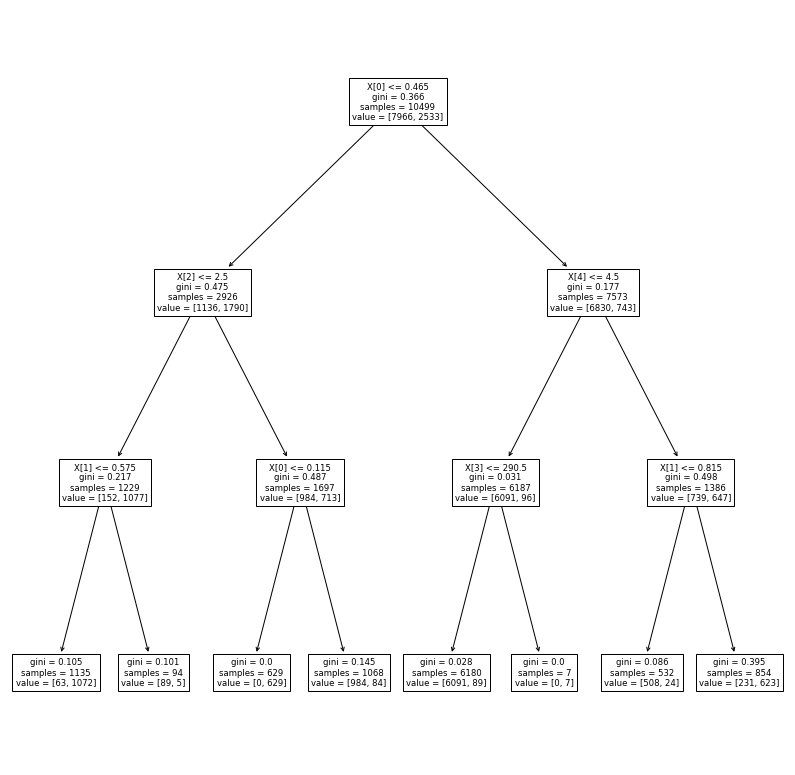

In [20]:
plt.figure(figsize=(14,14))
tree.plot_tree(dt);

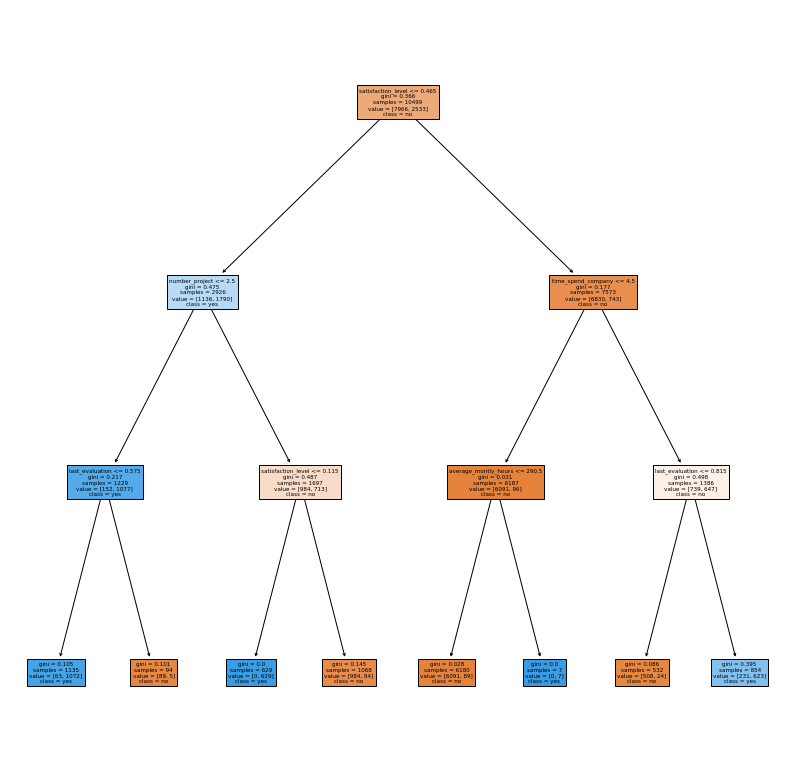

In [23]:
plt.figure(figsize=(14,14))
tree.plot_tree(dt,
               feature_names = X.columns, 
               class_names=['no','yes'],    # no: healthy, yes: 2nd heartattack
               filled = True);

In [24]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print(X_new)

[[3.80e-01 1.57e+02 0.00e+00]
 [8.00e-01 2.62e+02 0.00e+00]
 [1.10e-01 2.72e+02 0.00e+00]
 ...
 [3.70e-01 1.43e+02 0.00e+00]
 [1.10e-01 2.80e+02 0.00e+00]
 [3.70e-01 1.58e+02 0.00e+00]]


In [25]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.986      0.984      0.972      0.966      0.962      0.97866667
 0.98933333 0.994      1.         1.        ]
0.9832000000000001


In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9904444444444445

In [30]:
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.9904444444444445
[[3450   12]
 [  31 1007]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.97      0.98      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [29]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
satisfaction_level,0.286643
number_project,0.193386
time_spend_company,0.181396
average_montly_hours,0.161141
last_evaluation,0.136019
Work_accident,0.009026
salary_low,0.006371
salary_medium,0.004106
sales_technical,0.003624
sales_sales,0.003471


In [31]:
clf.predict_proba(X_test)

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.95, 0.05],
       [0.95, 0.05],
       [1.  , 0.  ]])

In [32]:
selector = SelectKBest(chi2, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 3 5]


In [39]:
X_logistic = df[['satisfaction_level','number_project', 'time_spend_company', 'average_montly_hours']]
print(X_logistic.head())

   satisfaction_level  number_project  time_spend_company  \
0                0.38               2                   3   
1                0.80               5                   6   
2                0.11               7                   4   
3                0.72               5                   5   
4                0.37               2                   3   

   average_montly_hours  
0                   157  
1                   262  
2                   272  
3                   223  
4                   159  


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.7664444444444445
[[3180  282]
 [ 769  269]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.49      0.26      0.34      1038

    accuracy                           0.77      4500
   macro avg       0.65      0.59      0.60      4500
weighted avg       0.73      0.77      0.74      4500

0.5888482049535335


In [41]:
import statsmodels.api as sm
logit_model=sm.Logit(y, X_logistic)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.461164
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14995
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                  0.1598
Time:                        12:11:57   Log-Likelihood:                -6917.0
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
satisfaction_level      -3.8828      0.080    -48.676      0.000      -4.039      -3.726

In [42]:
result.pred_table()

array([[10608.,   820.],
       [ 2635.,   936.]])

In [44]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print(model_extra.score(X, y))

# display the relative importance of each attribute
print((model_extra.feature_importances_))

1.0
[0.23489885 0.13151826 0.24943034 0.13680936 0.17118178 0.01851186
 0.00301116 0.00331278 0.00340321 0.00318389 0.00279742 0.00244282
 0.00270544 0.00555182 0.00514666 0.00560563 0.01436464 0.00612406]


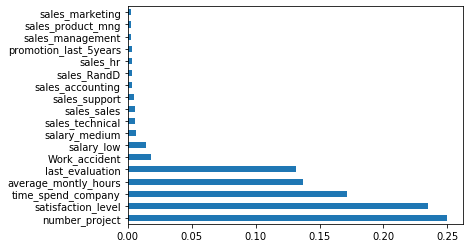

In [45]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

In [46]:
nn = MLPClassifier(solver='lbfgs', max_iter=500)
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [50]:
print(metrics.accuracy_score(y_test, nn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, nn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, nn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, nn.predict(X_test)))

0.7693333333333333
--------------------------------------------------------
[[3462    0]
 [1038    0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3462
           1       0.00      0.00      0.00      1038

    accuracy                           0.77      4500
   macro avg       0.38      0.50      0.43      4500
weighted avg       0.59      0.77      0.67      4500

--------------------------------------------------------
0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


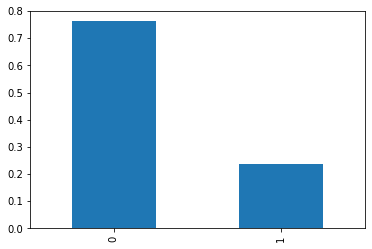

In [52]:
(df['left'].value_counts() / len(df)).plot(kind='bar');

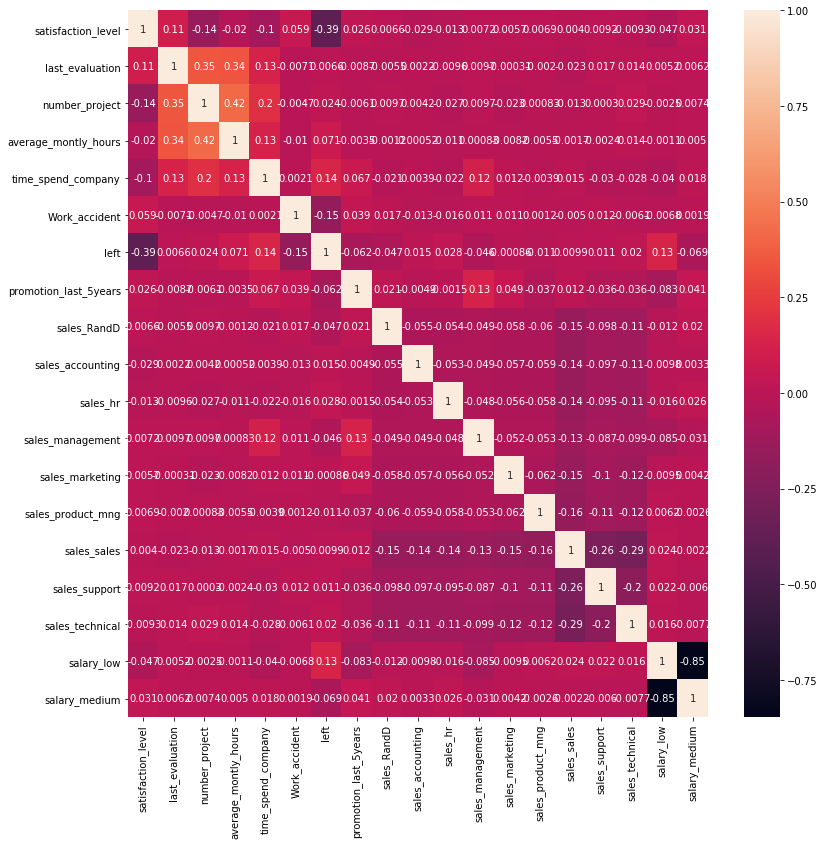

In [60]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(), annot=True);

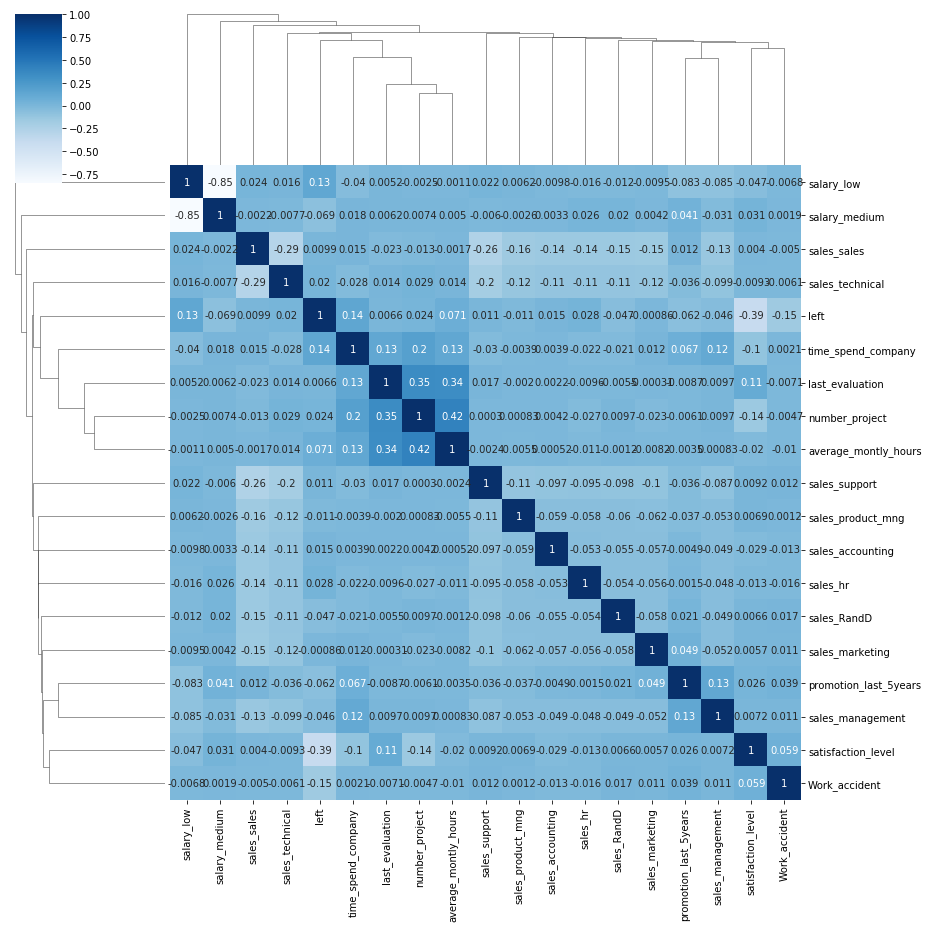

In [58]:
sns.clustermap(data=df.corr(), figsize=(13, 13), annot=True, cmap='Blues');

It appears that with the random forest classifer is the best model for this, with over .99 r squared value. In addition, the biggest factors that determine whether an employee will leave is the number of projects they have undertaken while at work,  their satisfaction level, and the total time they have spent at the company. Suprisingly, salary is not a major factor at all, with significantly less importance than other factors. 
